Epoch [0/2000], Loss: 41767.097656
Epoch [200/2000], Loss: 37297.371094
Epoch [400/2000], Loss: 28754.505859
Epoch [600/2000], Loss: 17704.982422
Epoch [800/2000], Loss: 7281.693359
Epoch [1000/2000], Loss: 1232.973022
Epoch [1200/2000], Loss: 83.726799
Epoch [1400/2000], Loss: 47.996338
Epoch [1600/2000], Loss: 15.933632
Epoch [1800/2000], Loss: 0.979184
Test loss: 0.000514
Prediction: 202.0032196044922


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


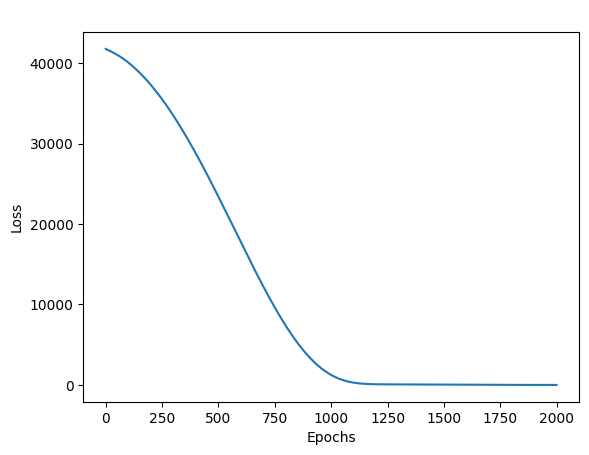

In [ ]:
import pandas as pd
data=pd.read_csv("dl blended.csv")
data

X=data[['height']]
Y=data[['weight']]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=33)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

import torch

X_train_tensor=torch.tensor(X_train,dtype=torch.float32)
Y_train_tensor=torch.tensor(Y_train.values,dtype=torch.float32).view(-1,1)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32)
Y_test_tensor=torch.tensor(Y_test.values,dtype=torch.float32).view(-1,1)

import torch.nn as nn
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1,8)
    self.fc2=nn.Linear(8,10)
    self.fc3=nn.Linear(10,1)
    self.relu=nn.ReLU()
    self.history={'loss':[]}

  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

gokul_brain = NeuralNet()
criterion=nn.MSELoss()
optimizer=torch.optim.RMSprop(gokul_brain.parameters(),lr=0.001)

def train_model(gokul_brain,X_train,y_train,criterion,optimizer,epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss = criterion(gokul_brain(X_train),y_train)
    loss.backward()
    optimizer.step()

    gokul_brain.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")

train_model(gokul_brain,X_train_tensor,Y_train_tensor,criterion,optimizer)

with torch.no_grad():
  test_loss=criterion(gokul_brain(X_test_tensor),Y_test_tensor)
  print(f"Test loss: {test_loss.item():.6f}")

import matplotlib.pyplot as plt
plt.plot(gokul_brain.history['loss'])
plt.title(" ")
plt.xlabel("Epochs")
plt.ylabel("Loss")

X_n1_1 = torch.tensor([[20]], dtype=torch.float32)
prediction = gokul_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

In [ ]:
import pandas as pd
data=pd.read_csv("dl blended.csv")
data



,height,weight
0,11,112
1,12,122
2,13,132
3,14,142
4,15,152
5,16,162
6,17,172
7,18,182
8,19,192
9,20,202


In [ ]:
import pandas as pd
data=